<a href="https://colab.research.google.com/github/milenaauzier/Supervised-Learning-With-Scikit-Learn/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SUPERVISED LEARNING WITH SCIKIT- LEARN**

Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
boston = pd.read_csv('/content/boston.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
X = boston.drop('MEDV', axis = 1).values

In [4]:
y = boston['MEDV'].values

In [5]:
X_rooms = X[:,5]
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [6]:
y = y.reshape(-1, 1)

In [7]:
X_rooms = X_rooms.reshape(-1, 1)

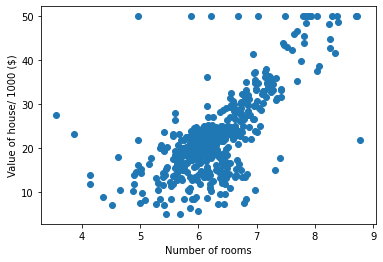

In [8]:
plt.scatter(X_rooms, y)
plt.ylabel('Value of house/ 1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

In [9]:
reg = LinearRegression()

In [10]:
reg.fit(X_rooms, y)

LinearRegression()

In [11]:
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1, 1)

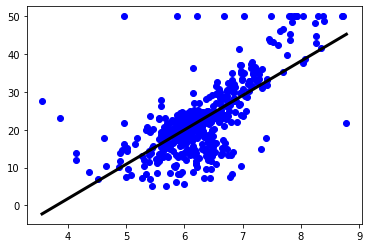

In [12]:
plt.scatter(X_rooms, y, color = 'blue')
plt.plot(prediction_space, reg.predict(prediction_space), 
                       color = 'black', linewidth = 3)
plt.show()

**Cross-validation** 

*   Model performance is dependent on way the data is split 
*   Not representative of the model's ability to generalize 

Cross Validation é uma técnica muito utilizada para avaliação de desempenho de modelos de aprendizado de máquina. O CV consiste em particionar os dados em conjuntos(partes), onde um conjunto é utilizado para treino e outro conjunto é utilizado para teste e avaliação do desempenho do modelo. A utilização do CV tem altas chances de detectar se o seu modelo está sobreajustado aos seus dados de treinamento, ou seja, sofrendo overfitting. Existem mais de um método de aplicação de CV, nesse artigo estarei focando nos métodos K-fold.

**K-fold Cross Validation**

K-fold consiste em dividir a base de dados de forma aleatória em K subconjuntos (em que K é definido previamente) com aproximadamente a mesma quantidade de amostras em cada um deles. A cada iteração, treino e teste, um conjunto formado por K-1 subconjuntos são utilizados para treinamento e o subconjunto restante será utilizado para teste gerando um resultado de métrica para avaliação (ex: acurácia). Esse processo garante que cada subconjunto será utilizado para teste em algum momento da avaliação do modelo.

**Valor de K**

O valor de K deve ser escolhido cuidadosamente de forma que cada grupo de dados para treino e teste sejam grandes o suficiente para representarem estatisticamente o dataset original. É possível encontrar na literatura a orientação para a utilização de k=5 ou k=10, valores encontrados através de experimentos, mas não é uma regra formal.

Um valor de K mal escolhido pode resultar em uma interpretação errada do desempenho do seu modelo como medidas de avaliação do modelo com alta variância (as medidas podem variar bastante de acordo com os dados utilizados para treinamento).






In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [14]:
reg = LinearRegression()

In [15]:
cv_results = cross_val_score(reg, X, y, cv = 5)

In [16]:
cv_results

array([ 0.63919994,  0.71386698,  0.58702344,  0.07923081, -0.25294154])

In [17]:
np.mean(cv_results)

0.35327592439588595

**Regularização**

De uma maneira bem direta, podemos entender regularização como a inserção de bias em um modelo. Ou em outras palavras, essa técnica desencoraja o ajuste excessivo dos dados, afim de diminuir a sua variância.

Dentro da regressão linear, Ridge e Lasso são formas de regularizarmos a nossa função através de penalidades. De forma simples, dentro de uma equação estatística dos dados, nós alteramos os fatores de forma a priorizar ou não certas parcelas da equação e, assim, evitamos ‘overfitting’ e melhoramos a qualidade de predição.

**Lasso**

Além de diminuir a variância do modelo, essa regularização tem uma outra importante aplicação em machine learning. Quando há múltiplas features altamente correlacionadas (ou seja, features que se comportam da mesma maneira) a regularização Lasso seleciona apenas uma dessas features e zera os coeficientes das outras, de forma a minimizar a penalização L1. Desse modo, dizemos que esse modelo realiza feature selection automaticamente, gerando vários coeficientes com peso zero, ou seja, que são ignorados pelo modelo. Isso facilita a interpretação do modelo, o que é uma enorme vantagem.

**Ridge** 

Nesse caso, a penalização consiste nos quadrados dos coeficientes, ao invés de seus módulos. Qual será o efeito dessa regularização nos coeficientes de duas features altamente correlacionadas? Poderíamos ter duas features com coeficientes parecidos, ou uma com coeficiente alto, e outra com coeficiente zero. Como a penalização L2 é desproporcionalmente maior para coeficientes maiores, a regularização Ridge faz com que features correlacionadas tenham coeficientes parecidos.

No entanto, essa regularização não diminui a susceptibilidade do modelo a outliers, de forma que é recomendável limpar o dataset e remover features desnecessárias antes de realizar esse tipo de regressão.

Em termos matemáticos, a penalidade L1 não é diferenciável, o que pode complicar a sua implementação. Já a L2 é diferenciável, o que significa que ela pode ser usada em abordagens baseadas em gradiente.

**Elastic Net — L1+L2**

Sim, se trata exatamente de combinar os termos de regularização de L1 e L2. Assim, obtemos o melhor dos dois mundos, porém temos que enfrentar o problema de determinar dois hiperparâmetros para obter soluções ótimas.



In [20]:
from sklearn.linear_model import Ridge 
from sklearn.model_selection import train_test_split 

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                        test_size = 0.3, random_state = 42)

In [22]:
ridge = Ridge(alpha = 0.1, normalize = True)

In [23]:
ridge.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


Ridge(alpha=0.1, normalize=True)

In [24]:
ridge_pred = ridge.predict(X_test)

In [25]:
ridge.score(X_test, y_test)

0.6996938275127313

In [26]:
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size = 0.3, random_state=42)
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


0.5950229535328548